In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline 
import re

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

## 이름의 알파벳 빈도수 조사

In [2]:
years = range(1880, 2011)
pieces = []
for year in years:
    path = "./res/babynames/yob%d.txt" % year 
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)
data = pd.concat(pieces, ignore_index=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [4]:
alphabetYear = []
def countAlpha(names):
    alphabet = {}
    for ch in list(names.lower()):
        if ch in alphabet.keys(): # 이미 존재하면
            alphabet[ch] += 1
        else: # 없는 경우
            alphabet[ch] = 1
    alphabetYear.append(alphabet)
    
data.groupby("year")["name"].sum().map(countAlpha)
alphabetDf = pd.DataFrame(alphabetYear, index=[year for year in years])
alphabetDf.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
1880,1383,197,307,415,1556,104,159,357,950,107,...,6,851,498,535,270,149,112,13,235,46
1881,1332,197,289,383,1505,106,164,327,927,108,...,5,825,478,504,265,142,115,17,216,46
1882,1475,227,325,428,1684,123,160,377,1018,117,...,5,911,516,569,291,167,128,20,253,58
1883,1435,204,330,413,1666,111,167,357,1022,108,...,6,889,496,547,260,156,116,16,230,48
1884,1597,253,341,478,1828,120,191,391,1100,124,...,4,987,561,621,301,183,126,19,269,58


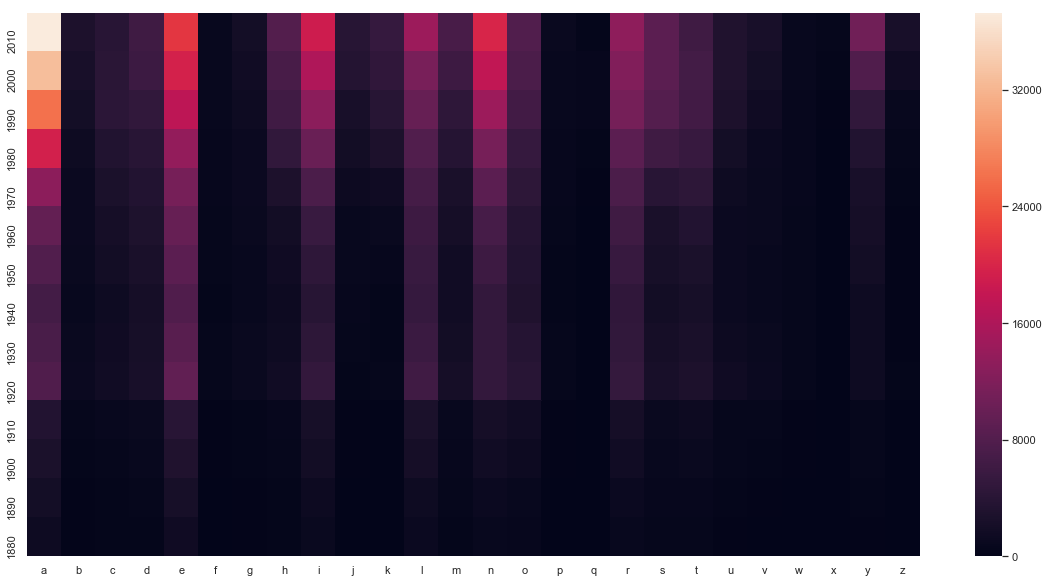

In [8]:
pyplot.figure(figsize=(20, 10))
sns.heatmap(alphabetDf[::-1][::10])

## 영화제목에서 영화 제목과 개봉 연도 분리
[[데이터 출처]](https://grouplens.org/datasets/movielens/)

In [9]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
rnames = ["user_id", "movie_id", "rating", "timestamp"]
mnames = ["movie_id", "title", "genres"]

users = pd.read_csv("./res/movielens/users.dat", names = unames, header=None, sep="::")
ratings = pd.read_csv("./res/movielens/ratings.dat", names=rnames, header=None, sep="::")
movies = pd.read_csv("./res/movielens/movies.dat", names=mnames, header=None, sep="::")

data = pd.merge(pd.merge(ratings, users), movies) # user_id로 merge → movie_id로 merge
data.info()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
movieList = []
for idx in range(movies.shape[0]):
    tmp = {}
    res = re.findall("([\w\D]+)\(([\d]+)\)", movies.iloc[idx].title)
    tmp["movie_id"], tmp["title"], tmp["year"] = movies.iloc[idx].movie_id, res[0][0].strip(), res[0][1]
    movieList.append(tmp)
print(movieList[0])

{'movie_id': 1, 'title': 'Toy Story', 'year': '1995'}


In [12]:
movieInfoDf = pd.DataFrame(movieList)
movieInfoDf.head()

,movie_id,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [13]:
movies.merge(movieInfoDf, how='inner', on="movie_id").head()

,movie_id,title_x,genres,title_y,year
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [14]:
movies.merge(movieInfoDf, how='inner', on="movie_id").tail()

,movie_id,title_x,genres,title_y,year
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents,2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream,2000
3880,3950,Tigerland (2000),Drama,Tigerland,2000
3881,3951,Two Family House (2000),Drama,Two Family House,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,"Contender, The",2000


## 장르 one-hot encoding

In [15]:
genres = []
for idx, movie in enumerate(movies["genres"]):
    tmp = {}
    tmp["genres"] = movie.split("|")[0] # 장르가 여러가지인 경우, 첫번째만 고려
    genres.append(tmp)
movies["genres"] = pd.DataFrame(genres)

In [16]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama


In [18]:
pd.get_dummies(movies["genres"])

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
